In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# autoreload   
%load_ext autoreload
%autoreload 2

In [3]:
#Load the image
img = cv2.imread('./memphis.jpeg')
#Convert the image from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plot the image
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

# Feature extraction
In this section three ellipses are extracted from the image

In [4]:
def plot_points(points, color='r', label=None):
    """
    Plot points on the image.
    """
    plt.scatter(points[:, 0], points[:, 1], c=color, marker='x', label=label, s=10, linewidths=.5)

### Point selection (manual)

Please select points for Circle 1 and press Enter when done.
Selected points for Circle 1: [(np.float64(531.516129032258), np.float64(273.90388440860204)), (np.float64(566.983870967742), np.float64(319.22377688172026)), (np.float64(643.8306451612902), np.float64(321.19420698924716)), (np.float64(714.766129032258), np.float64(297.5490456989246)), (np.float64(728.5591397849462), np.float64(269.9630241935482)), (np.float64(671.4166666666665), np.float64(246.31786290322566)), (np.float64(594.5698924731182), np.float64(248.28829301075257))]
Please select points for Circle 2 and press Enter when done.
Selected points for Circle 2: [(np.float64(1004.4193548387095), np.float64(285.72646505376326)), (np.float64(1144.3198924731182), np.float64(315.28291666666655)), (np.float64(1199.491935483871), np.float64(295.5786155913977)), (np.float64(1181.758064516129), np.float64(254.19958333333318)), (np.float64(1051.7096774193549), np.float64(248.28829301075257)), (np.float64(1018.2123655913979), np.flo

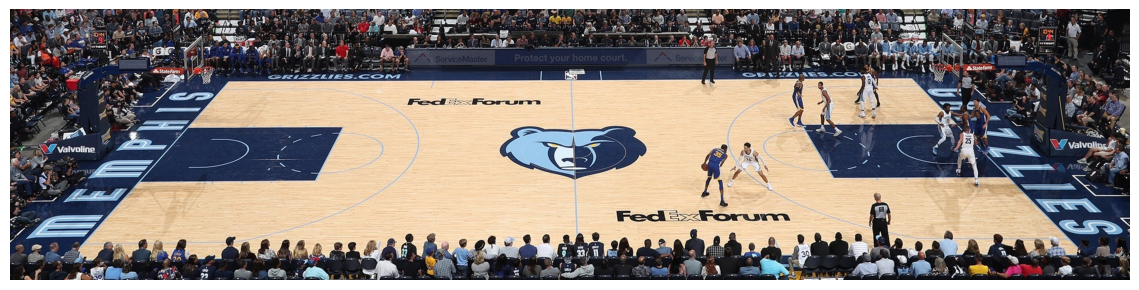

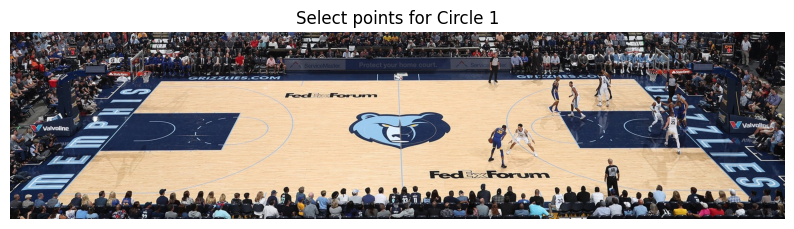

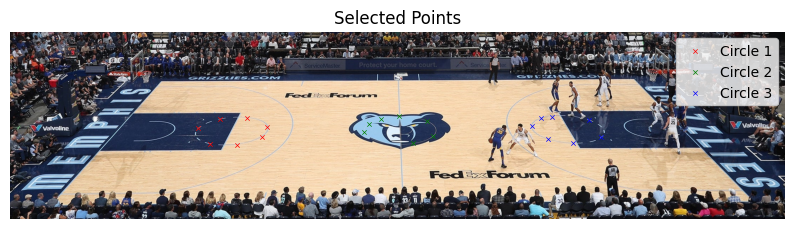

In [ ]:
if False:
    %matplotlib tk
    # Display the image and allow the user to select points interactively
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Select points of the first circle')

    def select_points(obj_name:str, color='r'):
        """
        Function to select points on the image.
        :param obj_name: Name of the object to select points for.
        :return: List of selected points.
        """
        plt.title(f'Select points for {obj_name}')
        print(f"Please select points for {obj_name} and press Enter when done.")
        points = plt.ginput(n=-1, timeout=0)  # n=-1 allows unlimited points, timeout=0 waits indefinitely
        print(f"Selected points for {obj_name}:", points)

        plot_points(np.array(points), color=color, label=obj_name)
        plt.legend()
        return points

    # Use ginput to select points
    points_C1 = select_points("Circle 1", color='r')
    points_C2 = select_points("Circle 2", color='g')
    points_C3 = select_points("Circle 3", color='b')

    plt.close()

    %matplotlib inline
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Selected Points')
    plot_points(np.array(points_C1), color='r', label='Circle 1')
    plot_points(np.array(points_C2), color='g', label='Circle 2')
    plot_points(np.array(points_C3), color='b', label='Circle 3')
    plt.legend()
    plt.show()

    #Save the points to a file
    with open('selected_points.txt', 'w') as f:
        f.write("Circle 1:\n")
        for point in points_C1:
            f.write(f"{point[0]}, {point[1]}\n")
        f.write("\nCircle 2:\n")
        for point in points_C2:
            f.write(f"{point[0]}, {point[1]}\n")
        f.write("\nCircle 3:\n")
        for point in points_C3:
            f.write(f"{point[0]}, {point[1]}\n")

Loaded points for Circle 1: [[531.51612903 273.90388441]
 [566.98387097 319.22377688]
 [643.83064516 321.19420699]
 [714.76612903 297.5490457 ]
 [728.55913978 269.96302419]
 [671.41666667 246.3178629 ]
 [594.56989247 248.28829301]]
Loaded points for Circle 2: [[1004.41935484  285.72646505]
 [1144.31989247  315.28291667]
 [1199.49193548  295.57861559]
 [1181.75806452  254.19958333]
 [1051.70967742  248.28829301]
 [1018.21236559  262.08130376]
 [1102.94086022  240.40657258]]
Loaded points for Circle 3: [[1538.40591398  242.37700269]
 [1506.87903226  246.3178629 ]
 [1479.29301075  267.99259409]
 [1526.58333333  305.43076613]
 [1595.5483871   317.25334677]
 [1676.33602151  297.5490457 ]
 [1642.83870968  250.25872312]]


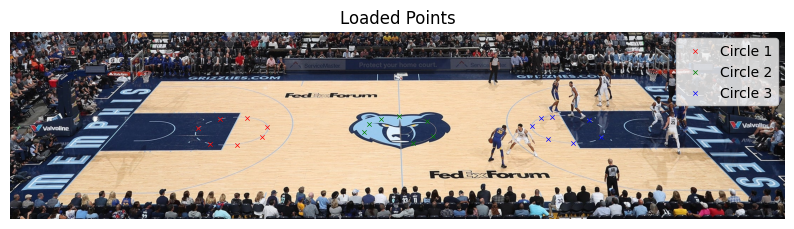

In [7]:
#Read points from the file
with open('selected_points.txt', 'r') as f:
    lines = f.readlines()
    points_C1 = []
    points_C2 = []
    points_C3 = []
    current_circle = None

    for line in lines:
        line = line.strip()
        if line.startswith("Circle 1:"):
            current_circle = points_C1
        elif line.startswith("Circle 2:"):
            current_circle = points_C2
        elif line.startswith("Circle 3:"):
            current_circle = points_C3
        elif line and current_circle is not None:
            x, y = map(float, line.split(','))
            current_circle.append((x, y))

    points_C1 = np.array(points_C1)
    points_C2 = np.array(points_C2)
    points_C3 = np.array(points_C3)

# Print the loaded points
print("Loaded points for Circle 1:", points_C1)
print("Loaded points for Circle 2:", points_C2)
print("Loaded points for Circle 3:", points_C3)

%matplotlib inline
#Plot the loaded points
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title('Loaded Points')
plot_points(points_C1, color='r', label='Circle 1')
plot_points(points_C2, color='g', label='Circle 2')
plot_points(points_C3, color='b', label='Circle 3')
plt.legend()
plt.show()

### Fit Ellipse to points

In [8]:
from HomoTopiContinuation.DataStructures.datastructures import Conic, Conics, Homography

In [9]:
def getConic(x0, y0, MA, ma, theta):
    a = MA / 2
    b = ma / 2
    theta_rad = np.deg2rad(theta)
    c, s = np.cos(theta_rad), np.sin(theta_rad)

    A = (c**2) / (a**2) + (s**2) / (b**2)
    B = 2 * c * s * (1/(a**2) - 1/(b**2))
    C = (s**2) / (a**2) + (c**2) / (b**2)
    D = -2*A*x0 - B*y0
    E = -2*C*y0 - B*x0
    F = A*x0**2 + B*x0*y0 + C*y0**2 - 1
    matrix = np.array([[A, B/2, D/2], [B/2, C, E/2], [D/2, E/2, F]])
    matrix /= matrix[0, 0]  # Normalize the matrix
    return Conic(matrix)

In [10]:
# Fit ellipses to the points using OpenCV
ellipse_C1 = cv2.fitEllipse(points_C1.astype(np.float32))
ellipse_C2 = cv2.fitEllipse(points_C2.astype(np.float32))
ellipse_C3 = cv2.fitEllipse(points_C3.astype(np.float32))

print("Ellipse parameters for Circle 1:", ellipse_C1)
print("Ellipse parameters for Circle 2:", ellipse_C2)
print("Ellipse parameters for Circle 3:", ellipse_C3)

#Convert the ellipses to matrix form
C1 = getConic(*ellipse_C1[0], *ellipse_C1[1], ellipse_C1[2])
C2 = getConic(*ellipse_C2[0], *ellipse_C2[1], ellipse_C2[2])
C3 = getConic(*ellipse_C3[0], *ellipse_C3[1], ellipse_C3[2])

print("Conic matrix for Circle 1:\n", C1.M)
print("Conic matrix for Circle 2:\n", C2.M)
print("Conic matrix for Circle 3:\n", C3.M)

Ellipse parameters for Circle 1: ((626.0374145507812, 283.71142578125), (77.74598693847656, 207.19590759277344), 85.92876434326172)
Ellipse parameters for Circle 2: ((1106.1622314453125, 280.01593017578125), (77.73226165771484, 203.18209838867188), 89.32938385009766)
Ellipse parameters for Circle 3: ((1582.3193359375, 277.9340515136719), (75.87484741210938, 205.82199096679688), 94.05906677246094)
Conic matrix for Circle 1:
 [[ 1.00000000e+00  4.19262094e-01 -7.44986861e+02]
 [ 4.19262094e-01  6.86063198e+00 -2.20891344e+03]
 [-7.44986861e+02 -2.20891344e+03  1.08267137e+06]]
Conic matrix for Circle 2:
 [[ 1.00000000e+00  6.82034430e-02 -1.12526028e+03]
 [ 6.82034430e-02  6.82606849e+00 -1.98685199e+03]
 [-1.12526028e+03 -1.98685199e+03  1.79075813e+06]]
Conic matrix for Circle 3:
 [[ 1.00000000e+00 -4.35093028e-01 -1.46139217e+03]
 [-4.35093028e-01  7.10040459e+00 -1.28498810e+03]
 [-1.46139217e+03 -1.28498810e+03  2.65926735e+06]]


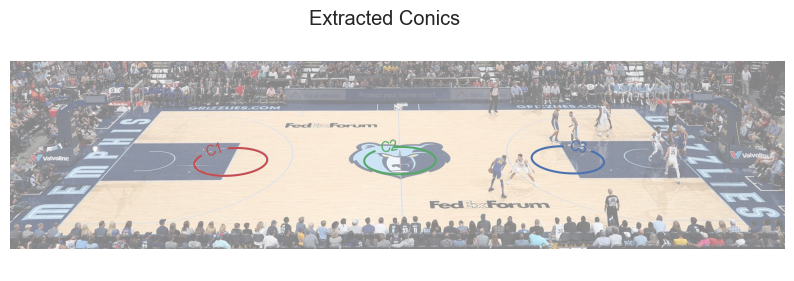

In [11]:
from HomoTopiContinuation.Plotter.Plotter import Plotter
plotter = Plotter(1, 1, title = "Extracted Conics", figsize=(10, 3))
plotter.newAxis(axisSame=False)
plotter.getCurrentAxis().imshow(img, alpha=0.5)
plotter.getCurrentAxis().axis('off')
plotter.getCurrentAxis().grid(False)
plotter.plotConic2D(C1, color='r', conicName="C1")
plotter.plotConic2D(C2, color='g', conicName="C2")
plotter.plotConic2D(C3, color='b', conicName="C3")
plotter.show()

# Rectification

In [28]:
from HomoTopiContinuation.Rectifier.homotopyc_rectifier import HomotopyContinuationRectifier
from HomoTopiContinuation.Rectifier.numeric_rectifier import NumericRectifier

rectifier = HomotopyContinuationRectifier()
H = rectifier.rectify(Conics(C1, C2, C3))
print(H.H)

[[-0.69927138  0.07519943  0.        ]
 [ 0.3031702   2.81914694  0.        ]
 [ 0.          0.          1.        ]]


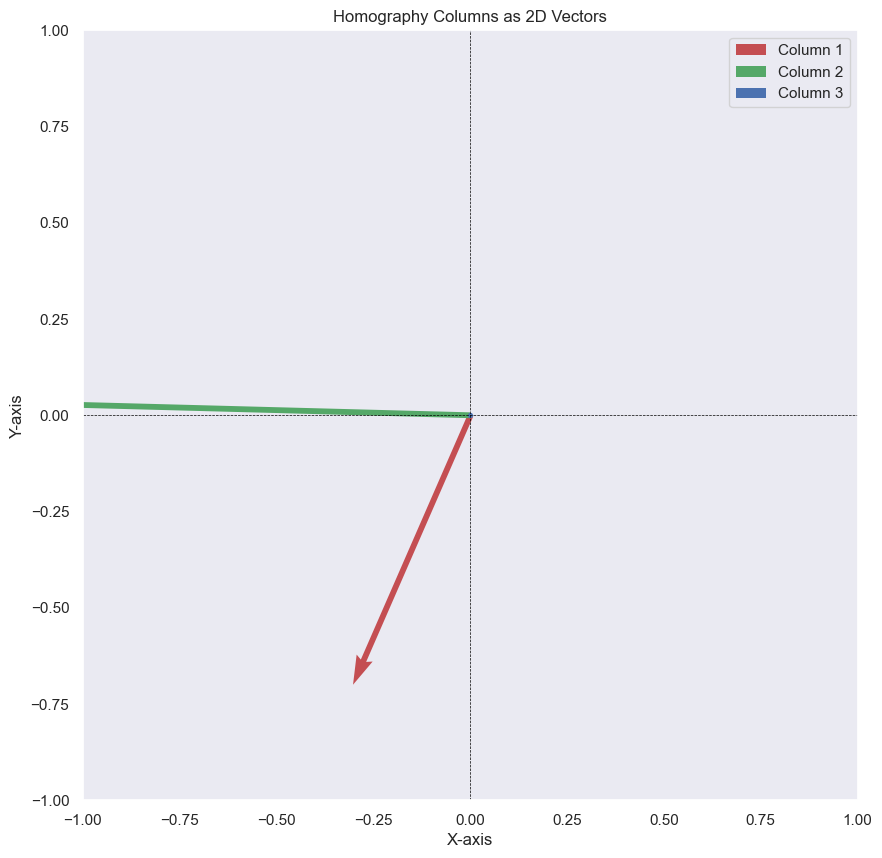

In [35]:
#plot the colomuns of the homography as 2D vectors
plt.figure(figsize=(10, 10))
plt.quiver(0, 0, H.H[0, 0], H.H[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='Column 1')
plt.quiver(0, 0, H.H[0, 1], H.H[1, 1], angles='xy', scale_units='xy', scale=1, color='g', label='Column 2')
plt.quiver(0, 0, H.H[0, 2], H.H[1, 2], angles='xy', scale_units='xy', scale=1, color='b', label='Column 3')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title('Homography Columns as 2D Vectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.legend()
plt.show()

In [34]:
#Rotate the homography by 90 deg counter clockwise
H.H = np.array([[0, 1, 0],
              [-1, 0, 0],
              [0, 0, 1]]) @ H.H
H.H

# H.H[0, :] = -H.H[0, :]

array([[-0.3031702 , -2.81914694,  0.        ],
       [-0.69927138,  0.07519943,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C1 warped:
 [[ 8.56119433e-01 -1.06997922e-01  8.02675297e+02]
 [-1.06997922e-01  1.97692757e+00  7.17374749e+02]
 [ 8.02675297e+02  7.17374749e+02  1.08267137e+06]]
C2 warped:
 [[ 8.42584937e-01 -2.77174541e-01  7.39146946e+02]
 [-2.77174541e-01  2.12703228e+00  1.28873136e+03]
 [ 7.39146946e+02  1.28873136e+03  1.79075813e+06]]
C3 warped:
 [[ 8.63007670e-01 -5.38415696e-01  5.05705579e+02]
 [-5.38415696e-01  2.34971651e+00  1.87062898e+03]
 [ 5.05705579e+02  1.87062898e+03  2.65926735e+06]]


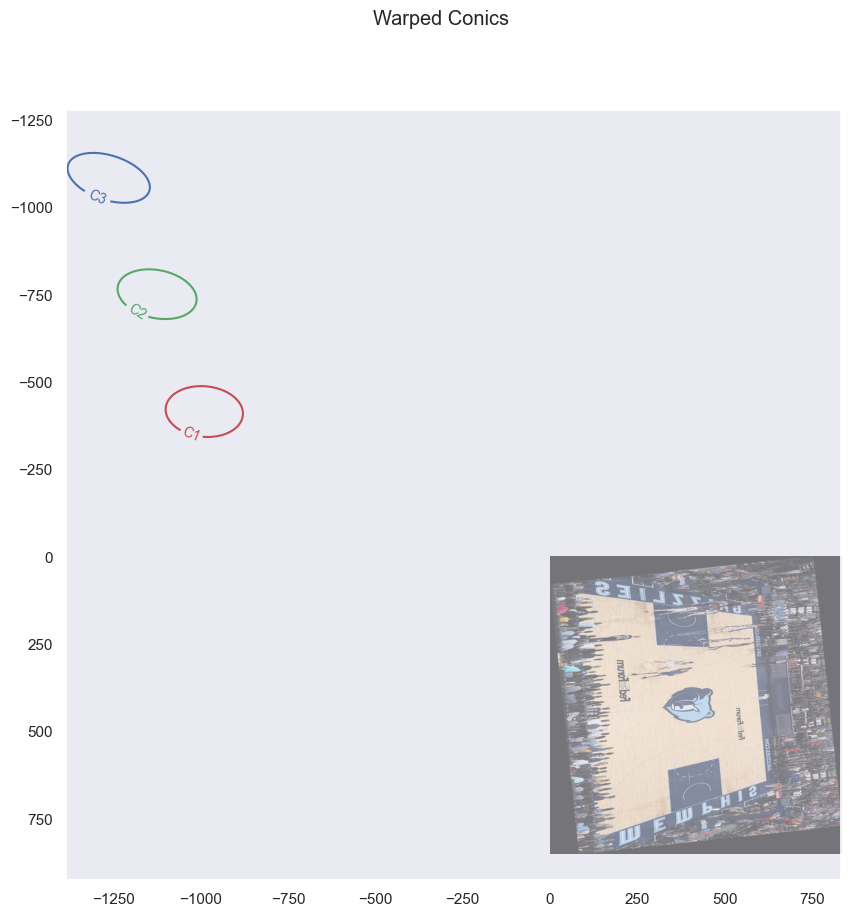

In [38]:
from HomoTopiContinuation.ImageWarper.ImageWarper import ImageWarper
# autoreload   
%load_ext autoreload
%autoreload 2
warper = ImageWarper()
warped_img, adjH = ImageWarper()(img, Homography(H.inv()))
adjH = Homography(adjH)
# Rectify the conics using the homography
C1_warped = C1.applyHomography(H)
print("C1 warped:\n", C1_warped.M)
C2_warped = C2.applyHomography(H)
print("C2 warped:\n", C2_warped.M)
C3_warped = C3.applyHomography(H)
print("C3 warped:\n", C3_warped.M)

plotter = Plotter(1, 1, title = "Warped Conics", figsize=(10, 10))

plotter.newAxis(axisSame=True)
ax = plotter.getCurrentAxis()
ax.grid(False)
ax.imshow(warped_img, alpha=0.5)
plotter.plotConic2D(C1_warped, color='r', conicName="C1")
plotter.plotConic2D(C2_warped, color='g', conicName="C2")
plotter.plotConic2D(C3_warped, color='b', conicName="C3")

plotter.show()
